In [1]:
# %load ml.py
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import linear_model
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

%config InlineBackend.figure_format='svg'
plt.rcParams['figure.dpi']=120

pd.options.display.float_format='{:,.2f}'.format
pd.set_option('display.max_colwidth', None)


In [2]:
df=pd.read_csv('./data/homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


<AxesSubplot:title={'center':'Peice vs Area'}, xlabel='Area', ylabel='Price'>

<AxesSubplot:xlabel='area'>

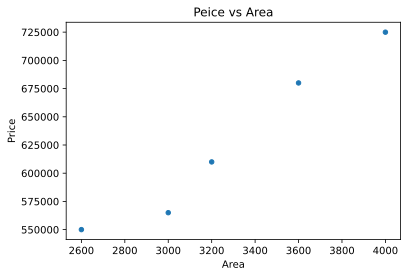

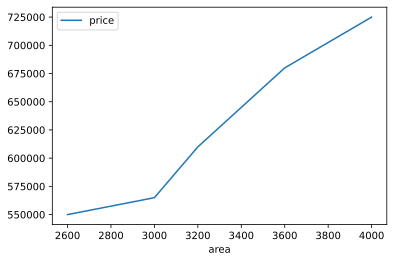

In [3]:
df.plot.scatter('area', 'price',
               xlabel='Area',
               ylabel='Price',
               title='Peice vs Area')

df.plot('area', 'price')



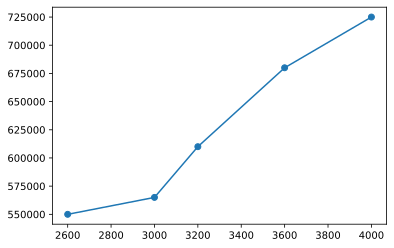

In [4]:
plt.scatter(df['area'], df['price'])
plt.plot(df['area'], df['price'])

<AxesSubplot:title={'center':'Peice vs Area'}, xlabel='Area', ylabel='Price'>

array([525000., 550000., 575000., 600000., 625000., 650000., 675000.,
       700000., 725000., 750000.])

['525k',
 '550k',
 '575k',
 '600k',
 '625k',
 '650k',
 '675k',
 '700k',
 '725k',
 '750k']

C:\Users\Kwang-Chul Kwon\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]


[Text(0, 525000.0, '525k'),
 Text(0, 550000.0, '550k'),
 Text(0, 575000.0, '575k'),
 Text(0, 600000.0, '600k'),
 Text(0, 625000.0, '625k'),
 Text(0, 650000.0, '650k'),
 Text(0, 675000.0, '675k'),
 Text(0, 700000.0, '700k'),
 Text(0, 725000.0, '725k'),
 Text(0, 750000.0, '750k')]

Text(0, 0.5, 'Price')

Text(0.5, 0, 'Area')

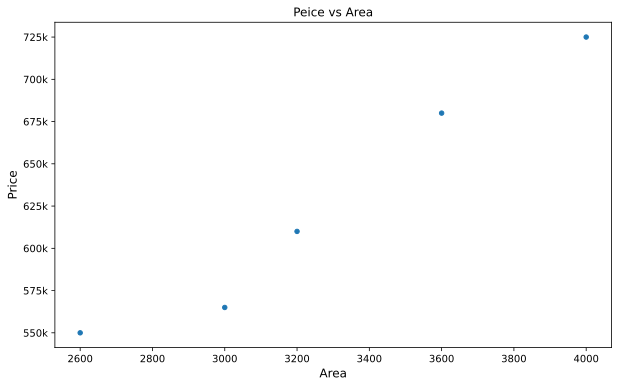

In [5]:
df_scatter=df.plot.scatter('area', 'price',
                           figsize=(10, 6),
               xlabel='Area',
               ylabel='Price',
               title='Peice vs Area')

df_scatter

df_scatter.get_yticks()

y_labels=[f'{label/1000:.0f}k' for label in df_scatter.get_yticks()]
y_labels
df_scatter.set_yticklabels(y_labels)
df_scatter.set_ylabel('Price', fontsize=12)
df_scatter.set_xlabel('Area', fontsize=12)

In [6]:
# create feature datase

X=df.drop('price', axis='columns')
X
y=df['price']
y

,area
0,2600
1,3000
2,3200
3,3600
4,4000


0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [7]:
# train linear regression algorithm

from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X,y)

LinearRegression()

In [8]:
predic_val=lr.predict([[3300]])
predic_val

C:\Users\Kwang-Chul Kwon\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([628715.75342466])

In [9]:
lr.coef_
lr.intercept_

array([135.78767123])

180616.43835616432

In [10]:
# create linear regression formula with coef_ and intercept_

x=int(input('Enter your area: '))

val=lr.coef_*x + lr.intercept_

print(f'Expected Price is {val}')

Enter your area: 3300
Expected Price is [628715.75342466]


### Generate csv file with list of predicted values of home price

In [11]:
area_df=pd.DataFrame({'area':[1000, 1500, 2300, 2700, 2200, 1800, 2100, 2550]})
area_df

,area
0,1000
1,1500
2,2300
3,2700
4,2200
5,1800
6,2100
7,2550


In [12]:
p=lr.predict(area_df)
p

array([316404.10958904, 384297.94520548, 492928.08219178, 547243.15068493,
       479349.31506849, 425034.24657534, 465770.54794521, 526875.        ])

In [13]:
area_df['predicted prices']=p
area_df

,area,predicted prices
0,1000,"316,404.11"
1,1500,"384,297.95"
2,2300,"492,928.08"
3,2700,"547,243.15"
4,2200,"479,349.32"
5,1800,"425,034.25"
6,2100,"465,770.55"
7,2550,"526,875.00"


In [14]:
area_df.to_csv('predicted prices.csv', index=False)

In [15]:
pd.read_csv('predicted prices.csv', )

,area,predicted prices
0,1000,"316,404.11"
1,1500,"384,297.95"
2,2300,"492,928.08"
3,2700,"547,243.15"
4,2200,"479,349.32"
5,1800,"425,034.25"
6,2100,"465,770.55"
7,2550,"526,875.00"


### Exercise

Predict canada's per capita income in year 2020. There is an exercise folder here on github at same level as this notebook, download that and you will find canada_per_capita_income.csv file. Using this build a regression model and predict the per capita income fo canadian citizens in year 2020

In [16]:
df=pd.read_csv('./data/canada_per_capita_income.csv')
df.head()

,year,per capita income (US$)
0,1970,"3,399.30"
1,1971,"3,768.30"
2,1972,"4,251.18"
3,1973,"4,804.46"
4,1974,"5,576.51"


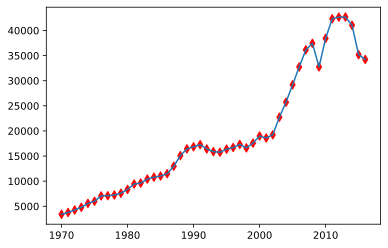

In [17]:
plt.scatter(df['year'], df['per capita income (US$)'], color='red', marker='d')
plt.plot(df['year'], df['per capita income (US$)'])

In [18]:
X=df.drop(['per capita income (US$)'], axis=1)
X

y=df['per capita income (US$)']
y

,year
0,1970
1,1971
2,1972
3,1973
4,1974
5,1975
6,1976
7,1977
8,1978
9,1979


0     3,399.30
1     3,768.30
2     4,251.18
3     4,804.46
4     5,576.51
5     5,998.14
6     7,062.13
7     7,100.13
8     7,247.97
9     7,602.91
10    8,355.97
11    9,434.39
12    9,619.44
13   10,416.54
14   10,790.33
15   11,018.96
16   11,482.89
17   12,974.81
18   15,080.28
19   16,426.73
20   16,838.67
21   17,266.10
22   16,412.08
23   15,875.59
24   15,755.82
25   16,369.32
26   16,699.83
27   17,310.76
28   16,622.67
29   17,581.02
30   18,987.38
31   18,601.40
32   19,232.18
33   22,739.43
34   25,719.15
35   29,198.06
36   32,738.26
37   36,144.48
38   37,446.49
39   32,755.18
40   38,420.52
41   42,334.71
42   42,665.26
43   42,676.47
44   41,039.89
45   35,175.19
46   34,229.19
Name: per capita income (US$), dtype: float64

In [19]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X, y)

LinearRegression()

In [20]:
predicted_2020=lr.predict([[2020]])
predicted_2020
print(f'${predicted_2020[0]:^20,.2f}')

C:\Users\Kwang-Chul Kwon\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([41288.69409442])

$     41,288.69      
